<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Delitos en USA Silhouette </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    

### Integrantes:
Angel Esteban Arroyo Ciau

Wilberth Eduardo López Gómez

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [2]:
# Ubicación de los datos en github
#url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv'
#df = pd.read_csv(url)

df = pd.read_csv('datos/USArrests.csv') 

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#renombramos la primera columna
df = df.rename(columns={'Unnamed: 0': 'US_state'})

In [5]:
df = df[['US_state', 'UrbanPop', 'Murder', 'Assault','Rape']]

In [6]:
#Principales parámetros estadísticos
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


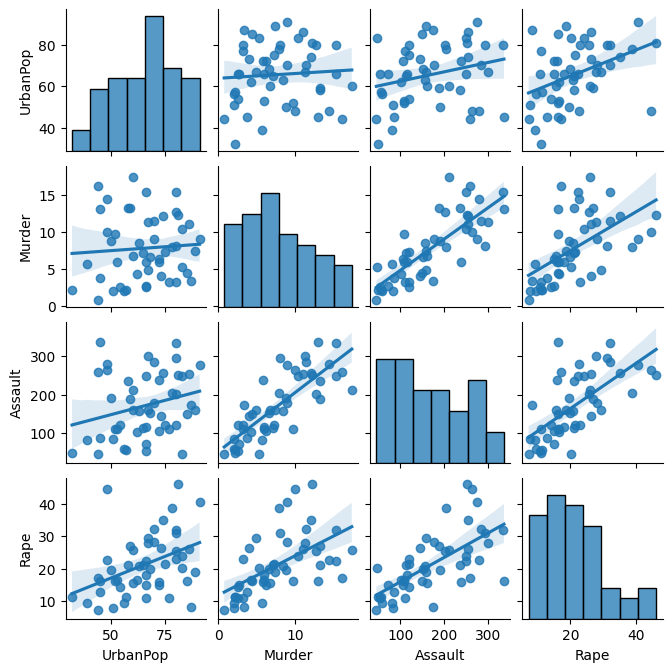

In [7]:
# Correlación lineal de variables
sns.pairplot(df, kind="reg",  height=1.7 , aspect=1)

In [8]:
#Selección de caracteristicas para llevar a cabo el agrupamiento
features = ['Murder','Assault','UrbanPop','Rape']

In [9]:
#Re-esalamiento de variables
from sklearn import preprocessing
df_standardized = preprocessing.scale(df[features])
df_standardized 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [10]:
# Data frame que servirá para la predicción de grupos
df_standardized = pd.DataFrame(df_standardized)
df_standardized.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [11]:
#creamos una lista de modelos de K-Means de un determinado número de clusters llamado kmeans2_sil
kmeans2_sil= [KMeans(n_clusters=i, random_state=42, init='k-means++').fit(df_standardized) for i in range(1,13)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=42)
                    for model in kmeans2_sil[1:]
                   ]
#Guardamos los valores de los coeficientes en un arreglo de numpy
sil_values = np.array( sil_values )
sil_values

array([0.40848903, 0.30813623, 0.33968891, 0.28926989, 0.30057718,
       0.27613425, 0.24606153, 0.23590602, 0.26367038, 0.2649357 ,
       0.25358382])

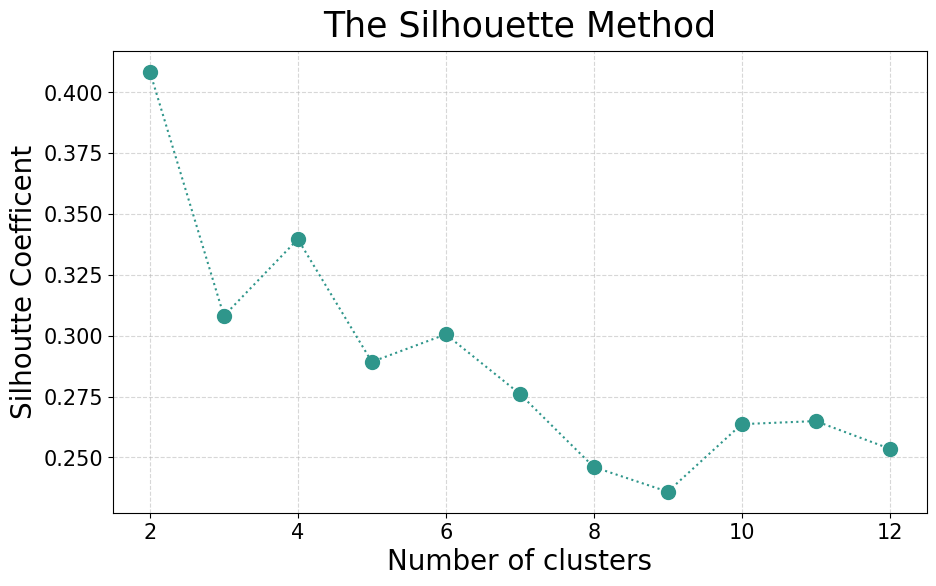

In [12]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Delitos en México </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    

### Instrucciones:
Utilizar los datos del archivo indice_paz_mex_impacto-economico_2020.csv para realizar un análisis similar, puede agregar las variables que crea conveniente, así como agregar otras incluso utilizando otra fuente de información, 

## 1. Datos y Normalización

### 1.1 Librerías

In [13]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

### 1.2 Obtención de datos

In [14]:
df = pd.read_csv('datos/indice_paz_mex_impacto-economico_2020.csv', encoding='latin-1')
df.head()

,Estados,Homicidio,Delitos_con_violencia,Delitos_con_armas_fuego,Delincuencia_organizada,Carcel_Sin_sentencia,Impacto_economico_de_la_violencia,Impacto_economico_per_capita_de_la_violencia,porcen_pib
0,AGUASCALIENTES,1.368,3.167,1.490,3.425,1.307,51.9,"36,158",14.5
1,BAJA_CALIFORNIA,5.000,3.296,5.000,5.000,2.110,259.6,"71,413",31.5
2,BAJA_CALIFORNIA_SUR,1.554,3.411,1.274,5.000,1.496,28.8,"35,761",13.4
3,CAMPECHE,1.533,1.223,1.345,1.723,4.297,21.6,"21,543",2.2
4,CHIAPAS,1.544,1.444,1.372,1.629,2.874,78.7,"13,742",17.8


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Homicidio,32.0,2.720625,1.287674,1.167,1.63275,2.1860,3.59925,5.000
Delitos_con_violencia,32.0,2.705656,0.847171,1.133,2.27850,2.7295,3.30025,4.783
Delitos_con_armas_fuego,32.0,2.575781,1.260074,1.042,1.49675,2.3575,3.15475,5.000
Delincuencia_organizada,32.0,2.883594,1.102784,1.454,1.82275,2.7020,3.57425,5.000
Carcel_Sin_sentencia,32.0,1.895000,0.862432,1.271,1.41700,1.5270,1.89400,5.000
Impacto_economico_de_la_violencia,32.0,147.328125,132.126921,21.600,60.65000,100.3000,199.22500,589.700
porcen_pib,32.0,20.946875,12.109766,2.200,13.77500,17.1500,29.62500,44.100


In [16]:
sns.pairplot(df)

### 1.3 Normalización de datos
Con Features seleccionamos las variables de interés dentro del dataframe df

In [17]:
features = ['Homicidio', 'Delitos_con_violencia', 'Delitos_con_armas_fuego', 'Delincuencia_organizada', 'porcen_pib']
from sklearn import preprocessing
df_standarized = preprocessing.scale(df[features])
df_standarized = pd.DataFrame(df_standarized)
df_standarized.head()


,0,1,2,3,4
0,-1.067249,0.553284,-0.875468,0.498801,-0.540888
1,1.798474,0.707992,1.954654,1.949857,0.885400
2,-0.920491,0.845910,-1.049630,1.949857,-0.633178
3,-0.937060,-1.778131,-0.992382,-1.069262,-1.572850
4,-0.928381,-1.513088,-0.970612,-1.155864,-0.264021


### 1.4 Agrupación de los datos

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42)
kmeans.fit(df_standarized)
kmeans.inertia_

160.0

## Método del Codo
Encontramos los valores de wcss

In [19]:
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_standarized)
    wcss.append(kmeans.inertia_)
wcss

[160.0,
 84.47639731113446,
 58.70280077913223,
 47.1627517219637,
 38.64899838909993,
 31.773128875944675,
 27.870252786683444,
 25.579214490835763,
 22.419910354686113,
 18.58257495918849,
 16.3346952625921,
 14.755478644872206]

Se procede a graficar el codo

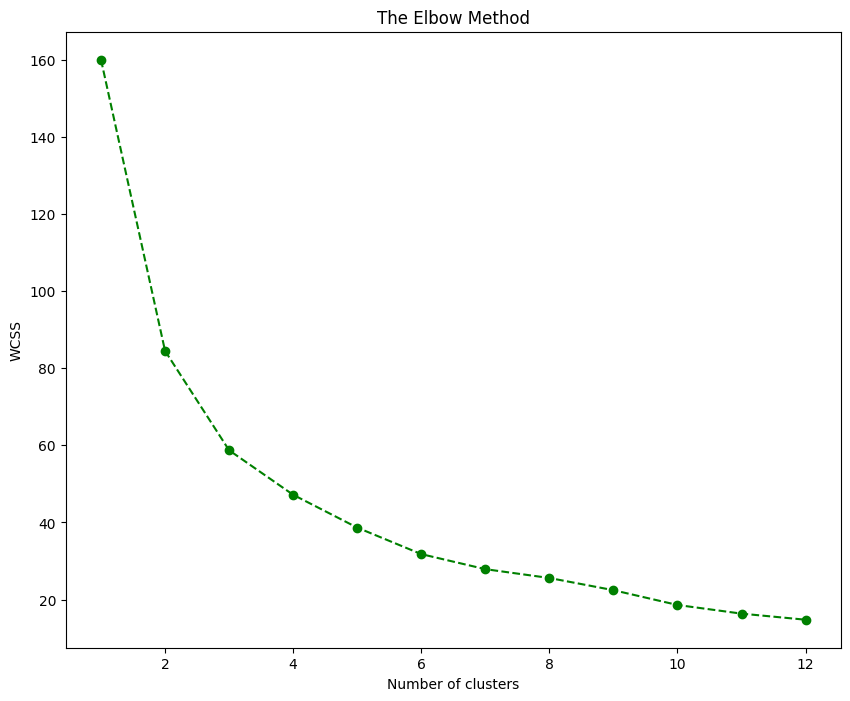

In [28]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), wcss,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

No se observa claramente cuál es el valor adecuado de clusters. Sin embargo, se realiza el método de la silueta a continuación para poder apoyarse para definir el número óptimo de clusters.

## Método de la silueta
Utilizamos el método aplicado por el profesor en su ejemplo

In [21]:
silhouette_score(df_standarized,  kmeans.labels_)

0.2769490841139869

In [22]:
#Lista de kmeans
kmeans2_sil= [KMeans(n_clusters=int(i), random_state=42, init='k-means++').fit(df_standarized) for i in range(1,13)]
#Score de kmeans
sil_values = [ silhouette_score(df_standarized, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]
#Arreglo con los scores
sil_values = np.array( sil_values )
sil_values

array([0.41026643, 0.32578278, 0.30376335, 0.29518244, 0.31679101,
       0.32123782, 0.29266383, 0.27490248, 0.28947299, 0.28786372,
       0.27694908])

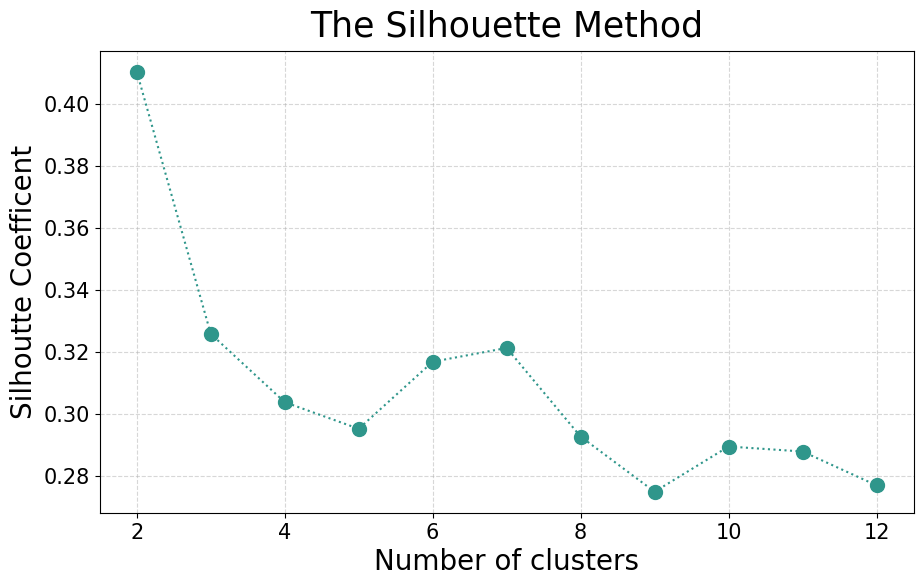

In [23]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

## Métodos Combinados

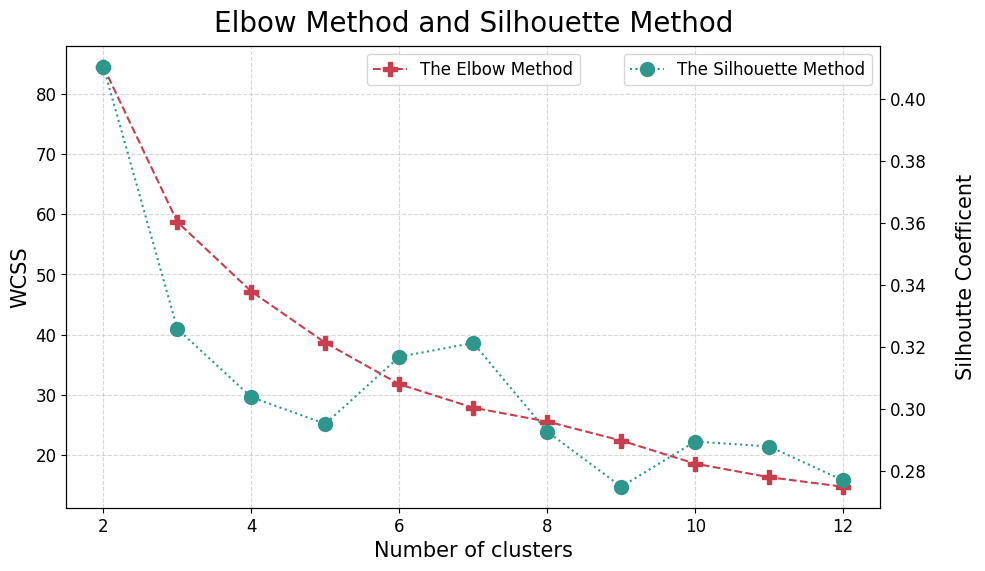

In [24]:
fig , ax1 = plt.subplots( figsize = (10.5,6) )

ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )
#--------------- WCSS -----------------
ax1.plot( range(2,13), wcss[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

#----------- optimal number of clusters -----------------

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper center', prop = {'size':12})


# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc=0, prop = {'size':12})


ax1.grid(  linestyle = 'dashed', alpha = 0.5 )

plt.show()


A partir de lo observado en las gráficas, se puede hacer una comparación con los clusters óptimos. La gráfica del codo da un aproximado a la mejor cantidad de clusters, a pesar de ello, con el método de la silueta se puede obtener una mejor coincidencia. En este caso se observa que el número ideal de clusters puede ser entre 7 y 6 clusters. Podría mal interpretarse el método de la silueta utilizando 2 o 3 clusters debido a su cercanía a 1, pero al compararlo con el método del codo se descartan estos valores.